# AIR BNB CASE STUDY-STORYTELLING

# Problem background

##### Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.
##### The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -

Which type of hosts to acquire more and where?
The categorisation of customers based on their preferences.
What are the neighbourhoods they need to target?
What is the pricing ranges preferred by customers?
The various kinds of properties that exist w.r.t. customer preferences.
Adjustments in the existing properties to make it more customer-oriented.
What are the most popular localities and properties in New York currently?
How to get unpopular properties more traction?


## 1. Importing libraries and reading the data

In [2]:
#Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the data
nyc = pd.read_csv('AB_NYC_2019.csv')
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [5]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 2. Categorization


#### Note: By categorizing, we will be able to better understand relationships and connections between things and better communicate our findings.

### 2.1 categorizing the "availability_365" column into 5 categories


In [6]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [7]:
def availability_365_cat(n):
    if n <= 1:
        return 'very Low'
    elif n <= 100:
        return 'Low'
    elif n <= 200 :
        return 'Medium'
    elif (n <= 300):
        return 'High'
    else:
        return 'very High'

In [8]:
nyc['availability_365_categories'] = nyc.availability_365.map(availability_365_cat)
nyc['availability_365_categories']

0        very High
1        very High
2        very High
3           Medium
4         very Low
           ...    
48890          Low
48891          Low
48892          Low
48893          Low
48894          Low
Name: availability_365_categories, Length: 48895, dtype: object

In [9]:
nyc['availability_365_categories'].value_counts()

very Low     17941
Low          11829
very High     8108
Medium        5792
High          5225
Name: availability_365_categories, dtype: int64

### 2.2 categorizing  the "minimum_nights" column into 5 categories

In [10]:
def minimum_night_cat(n):
    if n <= 1:
        return 'very Low'
    elif n <= 3:
        return 'Low'
    elif n <= 5 :
        return 'Medium'
    elif (n <= 7):
        return 'High'
    else:
        return 'very High'

In [11]:
nyc['minimum_night_categories'] = nyc.minimum_nights.map(minimum_night_cat)
nyc['minimum_night_categories']

0         very Low
1         very Low
2              Low
3         very Low
4        very High
           ...    
48890          Low
48891       Medium
48892    very High
48893     very Low
48894         High
Name: minimum_night_categories, Length: 48895, dtype: object

In [12]:
nyc.minimum_night_categories.value_counts()

Low          19695
very Low     12720
very High     7333
Medium        6337
High          2810
Name: minimum_night_categories, dtype: int64

### 2.3 categorizing  the "number_of_reviews" column into 5 categories

In [13]:
def number_of_reviews_cat(n):
    if n <= 1:
        return 'very Low'
    elif n <= 5:
        return 'Low'
    elif n <= 10 :
        return 'Medium'
    elif (n <= 30):
        return 'High'
    else:
        return 'very High'

In [14]:
nyc['number_of_reviews_categories'] = nyc.minimum_nights.map(number_of_reviews_cat)
nyc['number_of_reviews_categories']

0        very Low
1        very Low
2             Low
3        very Low
4          Medium
           ...   
48890         Low
48891         Low
48892      Medium
48893    very Low
48894      Medium
Name: number_of_reviews_categories, Length: 48895, dtype: object

## 3. Fixing columns

In [15]:
# To see Non-Null counts and data types
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### NOTE: last_review should be date type instead of object

In [16]:
nyc.last_review = pd.to_datetime(nyc.last_review)
nyc.last_review

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29996\804760938.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  nyc.last_review = pd.to_datetime(nyc.last_review)


0       2018-10-19
1       2019-05-21
2              NaT
3       2019-05-07
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [17]:
nyc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_365_categories',
       'minimum_night_categories', 'number_of_reviews_categories'],
      dtype='object')

#### There are no more Dtypes to be fixed and data does not contain inconsistencies . Hence, proceeding with further analysis


## 4. Data types

### 4.1 Categorical

In [18]:
nyc.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_365_categories',
       'minimum_night_categories', 'number_of_reviews_categories'],
      dtype='object')

In [19]:
# Categorical nominal
categorical_columns = nyc.columns[[1,3,4,5,8,16,17,18]]
categorical_columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'availability_365_categories', 'minimum_night_categories',
       'number_of_reviews_categories'],
      dtype='object')

In [20]:
# categorical columns
nyc[categorical_columns].head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,availability_365_categories,minimum_night_categories,number_of_reviews_categories
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,very High,very Low,very Low
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,very High,very Low,very Low
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,very High,Low,Low
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,Medium,very Low,very Low
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,very Low,very High,Medium


### 4.2 Numerical

In [21]:
numerical_columns = nyc.columns[[0,2,9,10,11,13,14,15]]
numerical_columns

Index(['id', 'host_id', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [22]:
nyc[numerical_columns].head()             

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,149,1,9,0.21,6,365
1,2595,2845,225,1,45,0.38,2,355
2,3647,4632,150,3,0,NaN,1,365
3,3831,4869,89,1,270,4.64,1,194
4,5022,7192,80,10,9,0.10,1,0


In [23]:
nyc[numerical_columns].describe()             

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


 ### 4.3 Coordinates and date

In [24]:
cdate = nyc.columns[[6,12]]
nyc[cdate]

,latitude,last_review
0,40.64749,2018-10-19
1,40.75362,2019-05-21
2,40.80902,NaT
3,40.68514,2019-05-07
4,40.79851,2018-11-19
...,...,...
48890,40.67853,NaT
48891,40.70184,NaT
48892,40.81475,NaT
48893,40.75751,NaT


## 5. Missing values

In [25]:
# To see the number of missing values
nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
availability_365_categories           0
minimum_night_categories              0
number_of_reviews_categories          0
dtype: int64

In [26]:
# Percentage of missing values
round((nyc.isnull().sum()/len(nyc))*100,2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
availability_365_categories        0.00
minimum_night_categories           0.00
number_of_reviews_categories       0.00
dtype: float64

#### - Two columns  (last_review , reviews_per_month) has around 20.56% missing values.  name and host_name has 0.3% and 0.4 % missing values

#### - We need to see if the values are, MCAR: It stands for Missing completely at random. 

#### - If the analysis is primarily for storytelling and no predictive model is being created, imputing missing values may not be necessary. In such cases, the missing data itself can tell an important story, such as:
1)Why are higher-priced listings less reviews?
2)Why are shared rooms getting fewer reviews?

#### -Imputing values in this scenario might obscure these insights. Instead, you could focus on explaining the reasons behind the missing data and what it indicates about customer behavior. Highlighting the missing data can provide valuable context for decision-making rather than trying to fill it in.

### 5.1 Missing values Analysis

In [27]:
nyc1 = nyc.loc[nyc.last_review.isnull(),:]
nyc1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,High,High,Medium
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,very Low,Medium,Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365,very High,very High,very High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365,very High,very Low,very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,Low,Low,Low
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,Low,Medium,Low
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,Low,very High,Medium
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,Low,very Low,very Low


### 5.2 Missing values Analysis ('neighbourhood_group' feature)

In [28]:
# Count of 'neighbourhood_group'with  missing values
nyc1.groupby('neighbourhood_group').neighbourhood_group.count() 

neighbourhood_group
Bronx             215
Brooklyn         3657
Manhattan        5029
Queens           1092
Staten Island      59
Name: neighbourhood_group, dtype: int64

In [29]:
# Count of 'neighbourhood_group'
nyc.groupby('neighbourhood_group').neighbourhood_group.count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [30]:
(nyc1.groupby('neighbourhood_group').neighbourhood_group.count()/nyc.groupby('neighbourhood_group').neighbourhood_group.count())*100

neighbourhood_group
Bronx            19.706691
Brooklyn         18.190410
Manhattan        23.216841
Queens           19.272856
Staten Island    15.817694
Name: neighbourhood_group, dtype: float64

<Axes: xlabel='neighbourhood_group'>

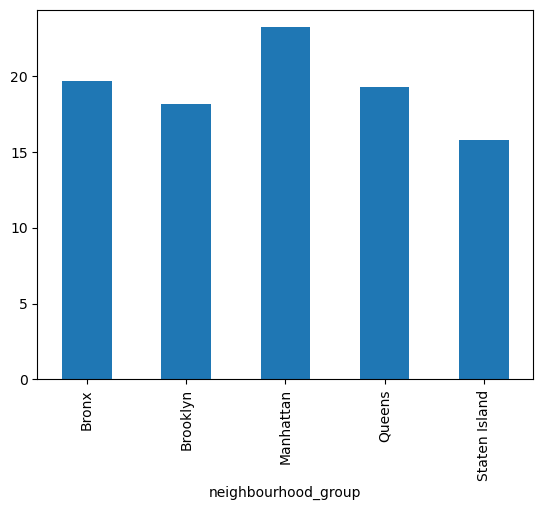

In [31]:
((nyc1.groupby('neighbourhood_group').neighbourhood_group.count()/nyc.groupby('neighbourhood_group').neighbourhood_group.count())*100).plot.bar()

In [32]:
((nyc1.groupby('neighbourhood_group').neighbourhood_group.count()/nyc.groupby('neighbourhood_group').neighbourhood_group.count())*100).mean()

19.240898461107257

#### - Each neighbourhood_group has about 19 % missing values in 'last_review' feature.

In [33]:
nyc1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,High,High,Medium
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,very Low,Medium,Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365,very High,very High,very High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365,very High,very Low,very Low


### 5.3 Missing values Analysis ('room_type' feature)

In [34]:
# Count of 'room_type' with missing values
nyc3 = (nyc1.groupby('room_type').room_type.count()/nyc.groupby('room_type').room_type.count())*100
nyc3

room_type
Entire home/apt    19.981109
Private room       20.877004
Shared room        27.068966
Name: room_type, dtype: float64

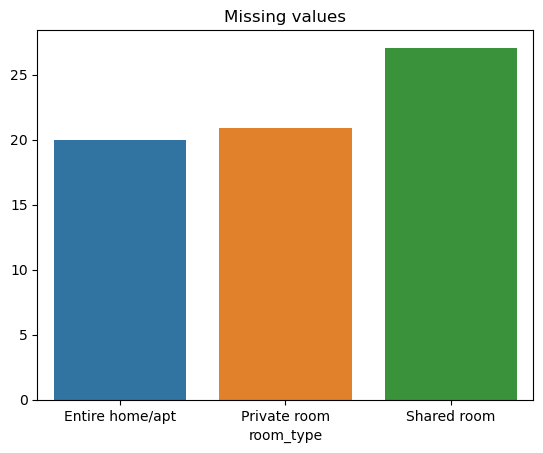

In [35]:
plt.title('Missing values')
sns.barplot(x = nyc3.index, y = nyc3.values)
plt.show()

#### 'Shared room' has the highest missing value percentage (27 %) for 'last_review' feature while to other room types has only about 20 %.

In [36]:
print('Mean and Median of prices with last_review feature missing')
print('Mean   = ', nyc[nyc['last_review'].isnull()].price.mean())
print('Median = ', nyc[nyc['last_review'].isnull()].price.median())

print('\nMean and Median of prices with last_review feature not missing')
print('Mean   = ', nyc[nyc['last_review'].notnull()].price.mean())
print('Median = ', nyc[nyc['last_review'].notnull()].price.median())

Mean and Median of prices with last_review feature missing
Mean   =  192.9190210903303
Median =  120.0

Mean and Median of prices with last_review feature not missing
Mean   =  142.317946605566
Median =  101.0


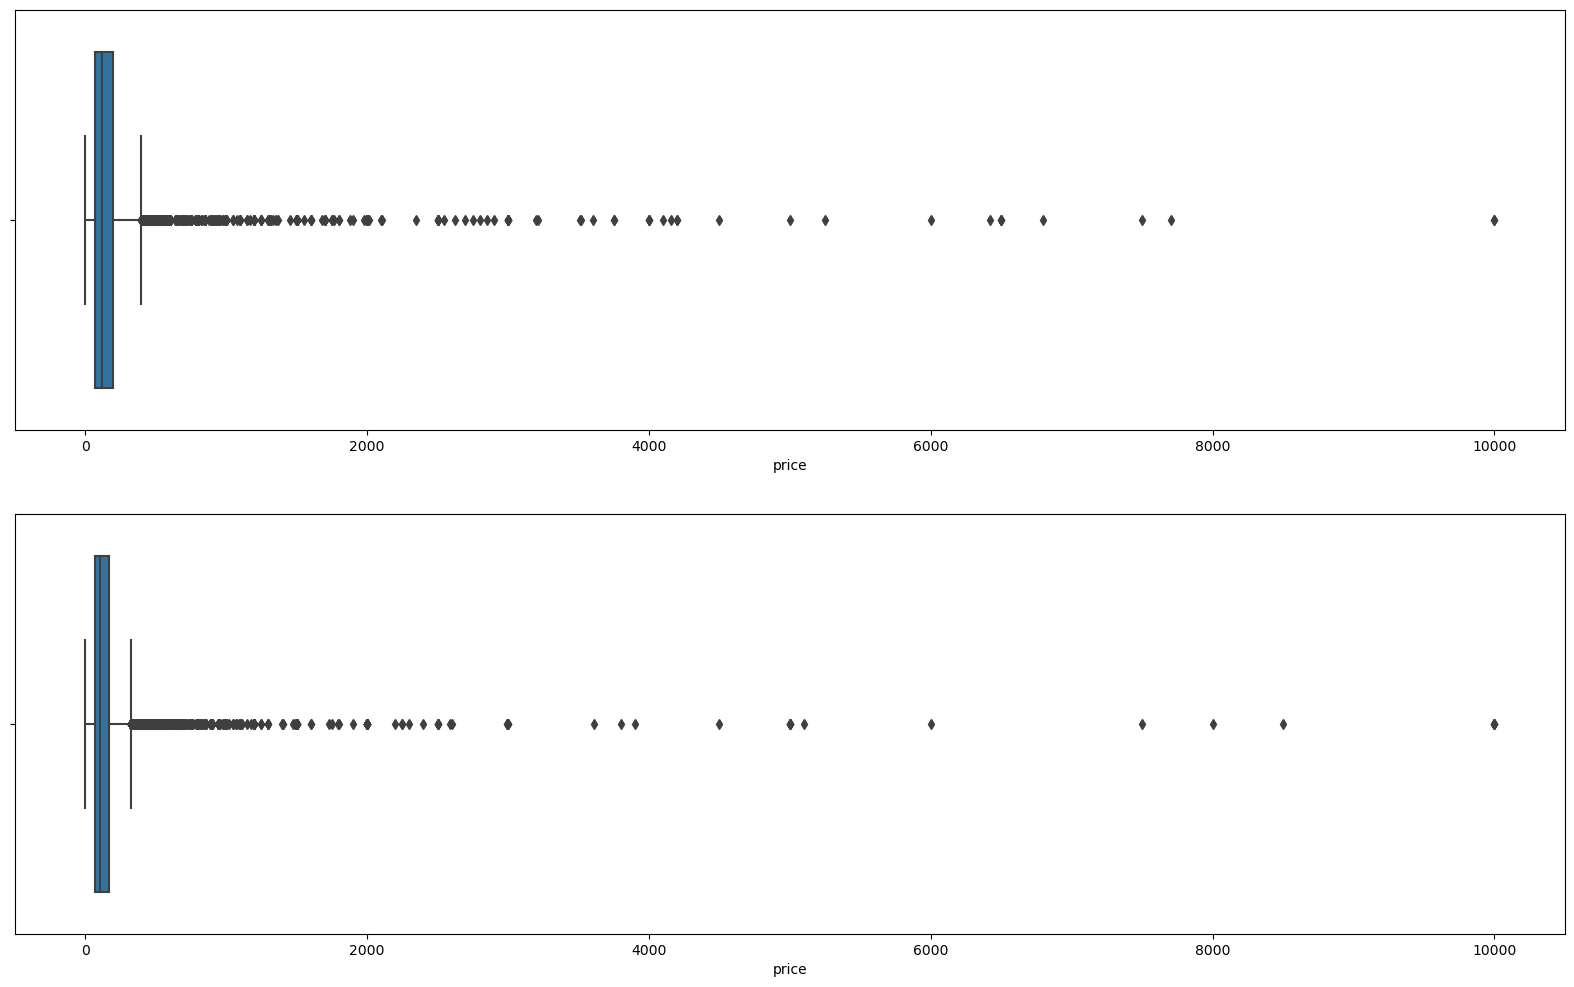

In [37]:
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
sns.boxplot(data = nyc[nyc['last_review'].isnull()] , x = 'price',  width= .8)

plt.subplot(2,1,2)
sns.boxplot(data = nyc[nyc['last_review'].notnull()] , x = 'price',  width= .8)

plt.show()

#### -Higher prices are linked to missing last_review values, indicating that high-priced listings are less likely to receive reviews.
#### -Shared rooms tend to have fewer reviews, which contributes to the missing last_review data for these room types.
#### -As prices increase, the likelihood of receiving reviews decreases, possibly due to fewer bookings or higher customer expectations.
#### -The missing values in last_review are not random but influenced by factors like price and room type.
#### -This suggests the missing data is not MAR (Missing at Random), where missingness depends on observable features.
#### -Airbnb could encourage more reviews from high-priced properties and shared room listings to better capture customer feedback.

## 6. Univariate Analysis

In [38]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium


### 6.1 name

In [39]:
nyc.name.value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47896, dtype: int64

### 6.2 host_id

In [40]:
nyc.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

### 6.3 host_name

In [41]:
nyc.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [42]:
nyc.host_name.value_counts().index[:10]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria'],
      dtype='object')

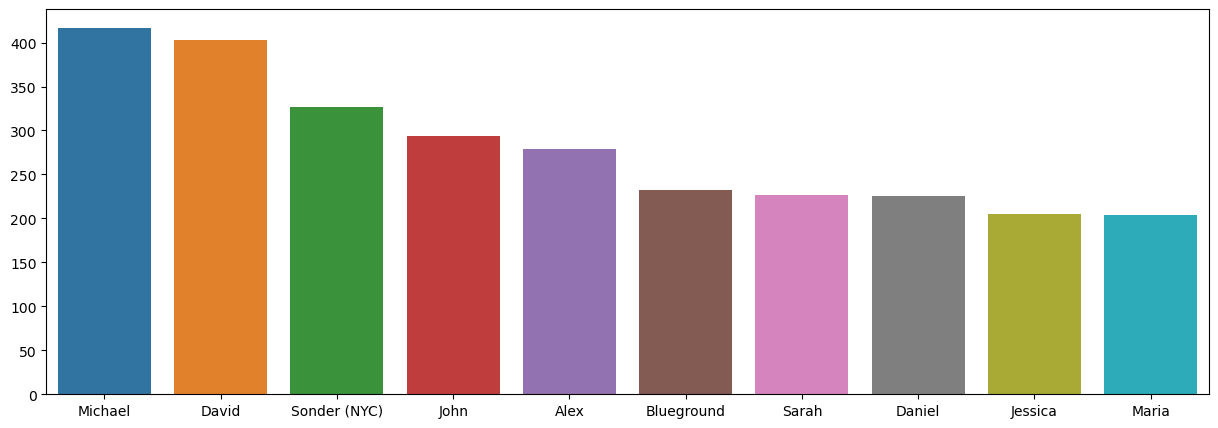

In [43]:
# Top 10 host's
plt.figure(figsize=(15,5))
sns.barplot(x = nyc.host_name.value_counts().index[:10] , y = nyc.host_name.value_counts().values[:10])
plt.show()

### 6.4 neighbourhood_group

In [44]:
nyc.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [45]:
nyc.neighbourhood_group.value_counts(normalize= True) * 100

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

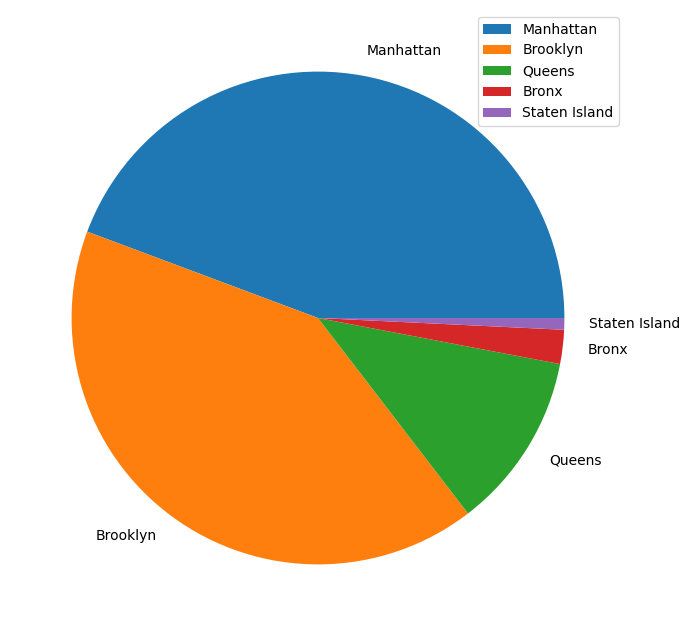

In [46]:
plt.figure(figsize=(8,8))
plt.pie(x = nyc.neighbourhood_group.value_counts(normalize= True) * 100,labels = nyc.neighbourhood_group.value_counts(normalize= True).index)
plt.legend()
plt.show()

#### What are the neighbourhoods they need to target?

~85 % of the listing are Manhattan and Brooklyn neighbourhood_group

### 6.5 neighbourhood

In [47]:
nyc.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [48]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium


### 6.6 room_type

In [49]:
nyc.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [50]:
nyc.room_type.value_counts(normalize=True)*100

Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64

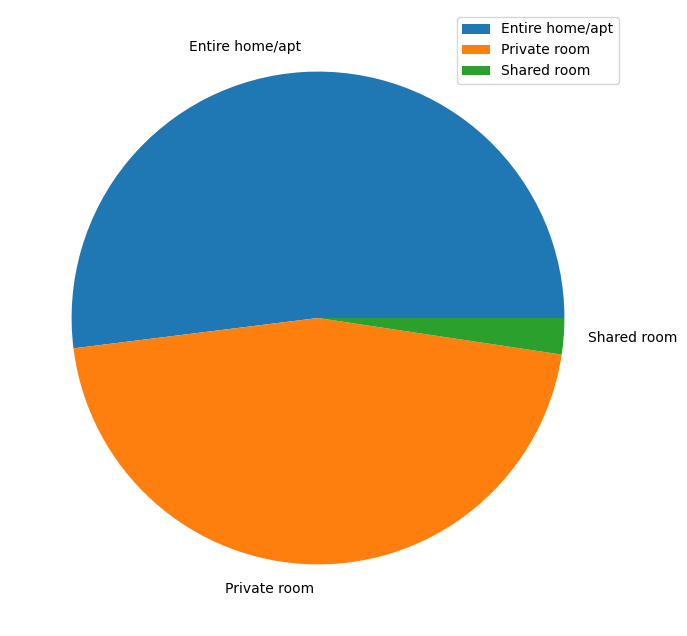

In [51]:
plt.figure(figsize=(8,8))
plt.pie(x = nyc.room_type.value_counts(normalize= True) * 100,labels = nyc.room_type.value_counts(normalize= True).index)
plt.legend()
plt.show()

### 6.7 price

In [52]:
nyc.price.value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

<Axes: ylabel='Frequency'>

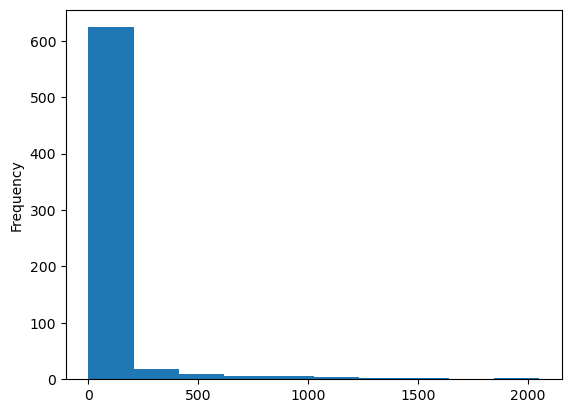

In [53]:
nyc.price.value_counts().plot.hist()

#### NOTE: Low/ very low price range is preferred by customers 

<Axes: xlabel='price', ylabel='Count'>

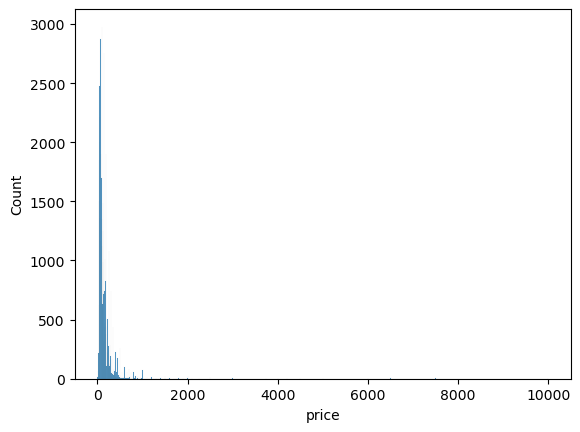

In [54]:
sns.histplot(data = nyc.price)

<Axes: xlabel='price', ylabel='Count'>

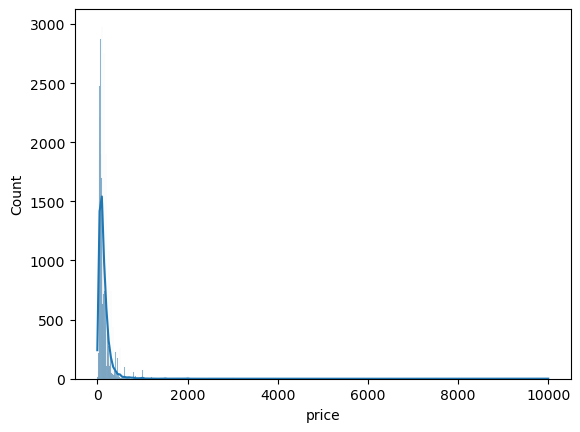

In [55]:
sns.histplot(data = nyc.price,kde = True)

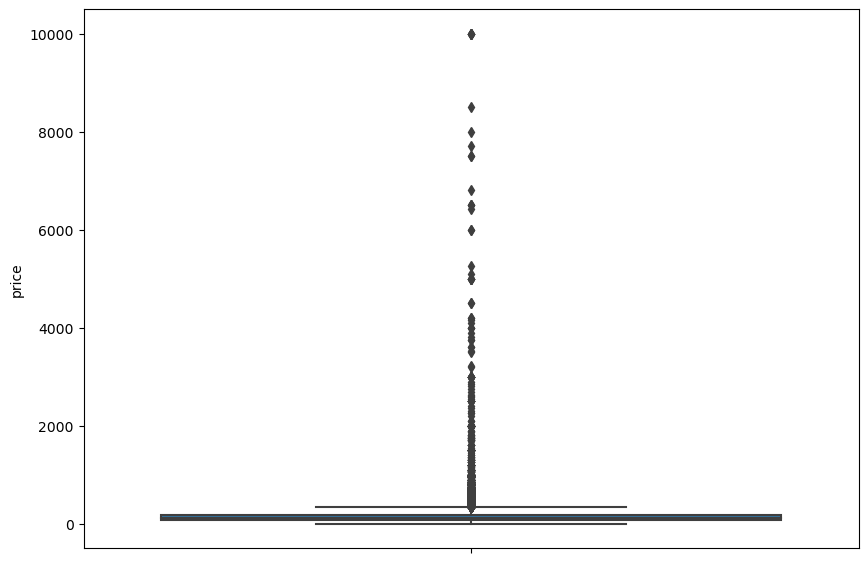

In [56]:
plt.figure(figsize=(10,7))
sns.boxplot(y = nyc.price)
plt.show()

### 6.8 minimum_nights

In [57]:
nyc.minimum_nights.value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

In [58]:
nyc.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

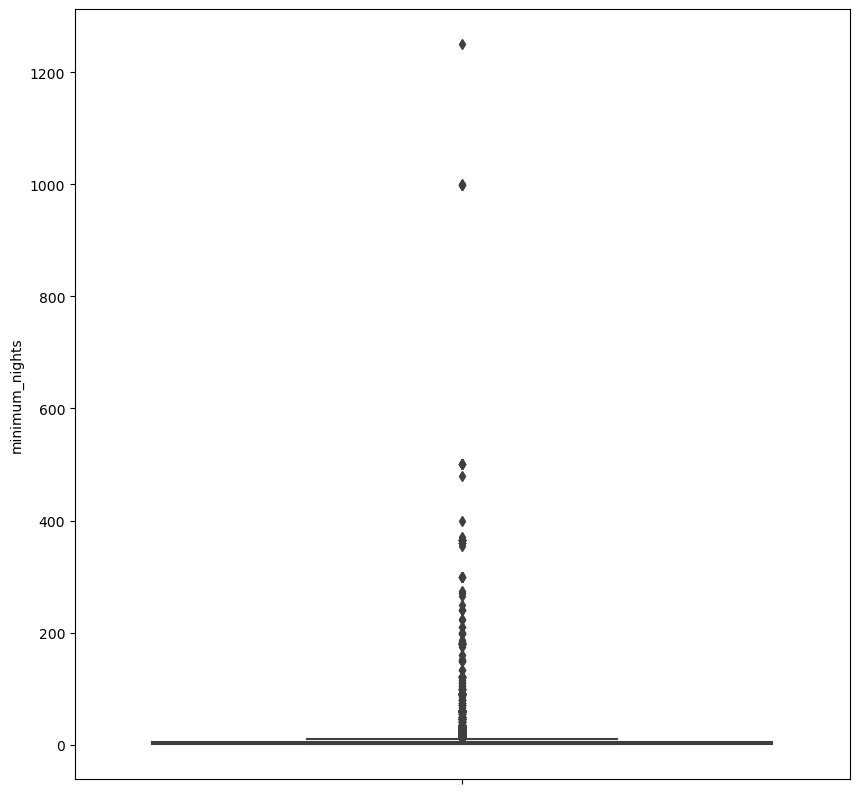

In [59]:
plt.figure(figsize=(10,10))
sns.boxplot(y=nyc.minimum_nights)
plt.show()

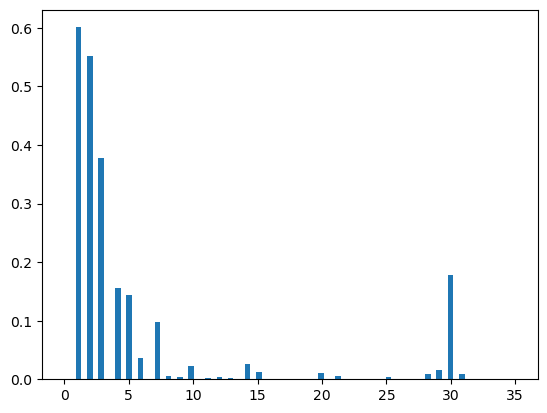

In [60]:
plt.hist(data =nyc, x = 'minimum_nights',bins=80,range=(0,35),density=True)
plt.show()

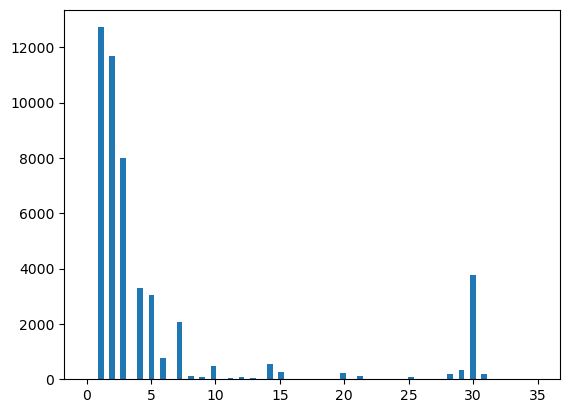

In [61]:
plt.hist(data = nyc, x = 'minimum_nights',bins=80,range=(0,35))
plt.show()

### 6.9 number_of_reviews

In [62]:
nyc.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

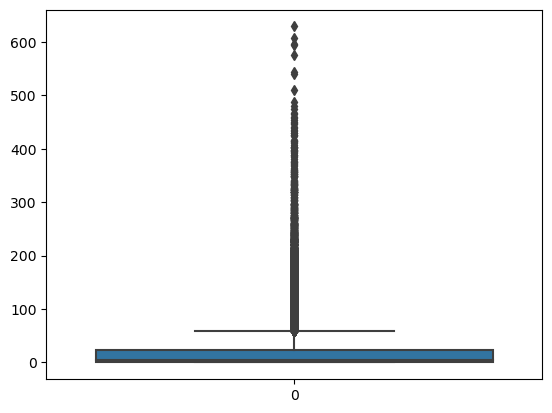

In [63]:
sns.boxplot(data = nyc.number_of_reviews)
plt.show()

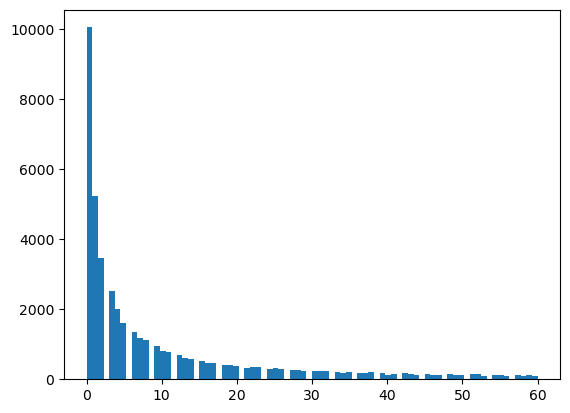

In [64]:
plt.hist(data = nyc, x = 'number_of_reviews',bins=80,range=(0,60))
plt.show()

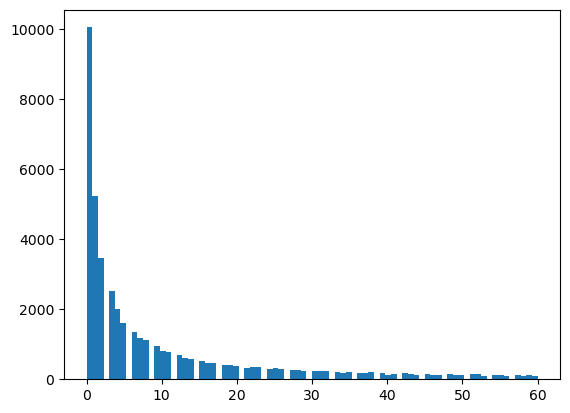

In [65]:
plt.hist(data = nyc, x = 'number_of_reviews',bins=80,range=(0,60))
plt.show()

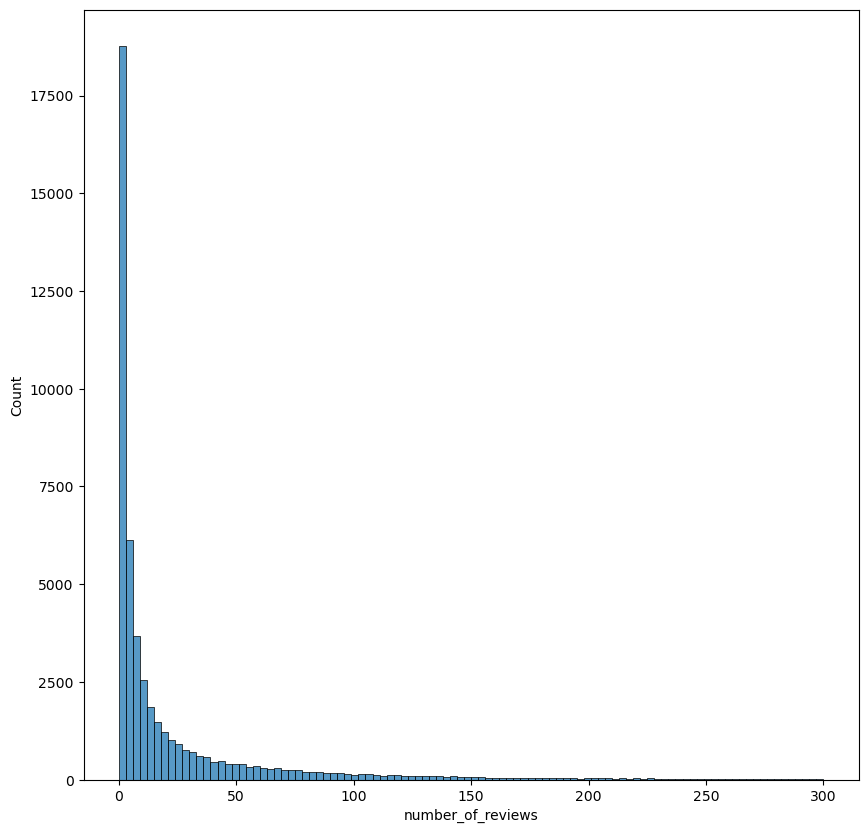

In [66]:
plt.figure(figsize = (10,10))
sns.histplot(data = nyc, x = 'number_of_reviews',bins=100,binrange=(0,300))
plt.show()

### 6.10 reviews_per_month

In [67]:
nyc.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

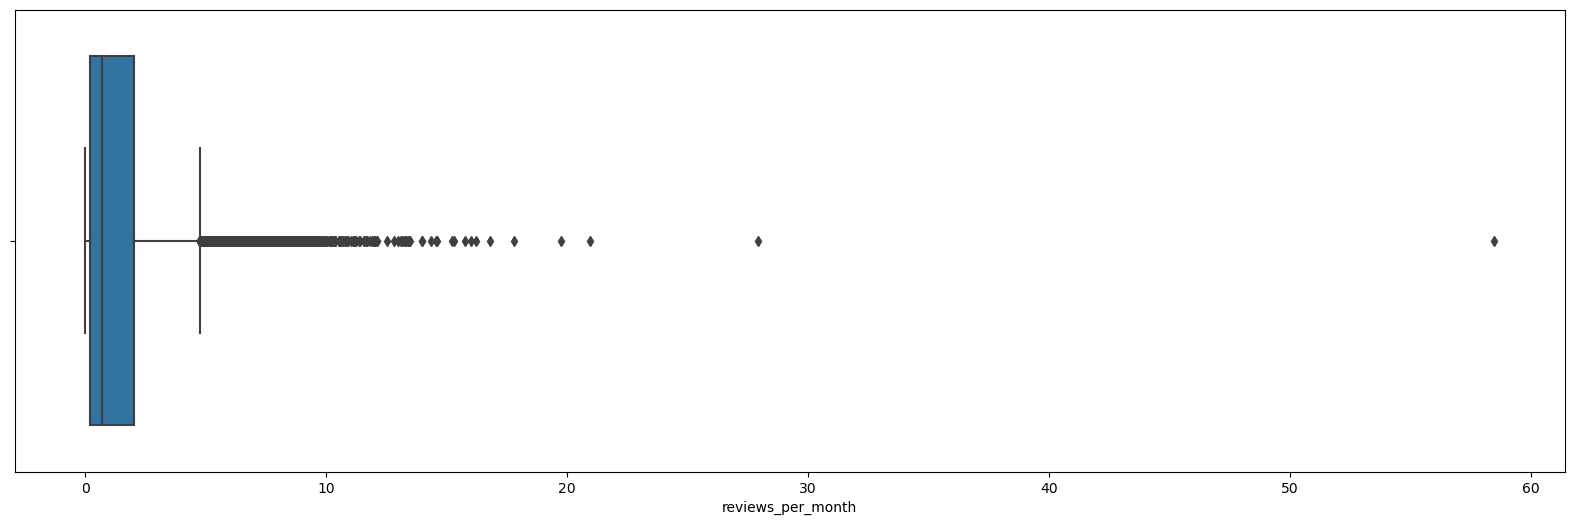

In [68]:
plt.figure(figsize = (20,6))
sns.boxplot(data = nyc, x = 'reviews_per_month')
plt.show()

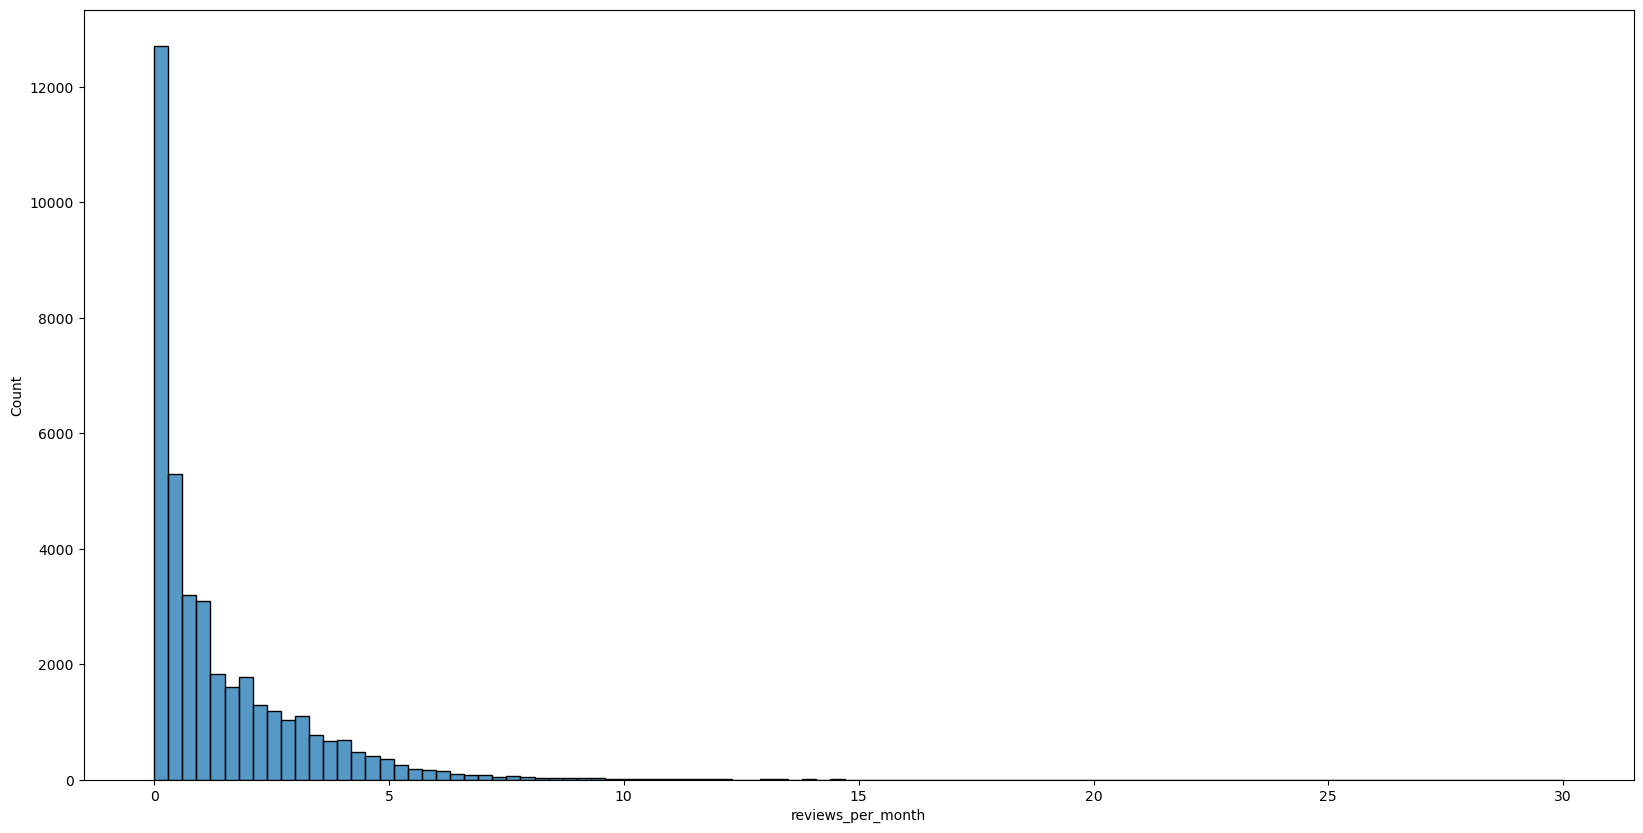

In [69]:
plt.figure(figsize = (20,10))
sns.histplot(data = nyc, x = 'reviews_per_month',bins=100,binrange=(0,30))
plt.show()

In [70]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium


### 6.11 calculated_host_listings_count

In [71]:
nyc.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

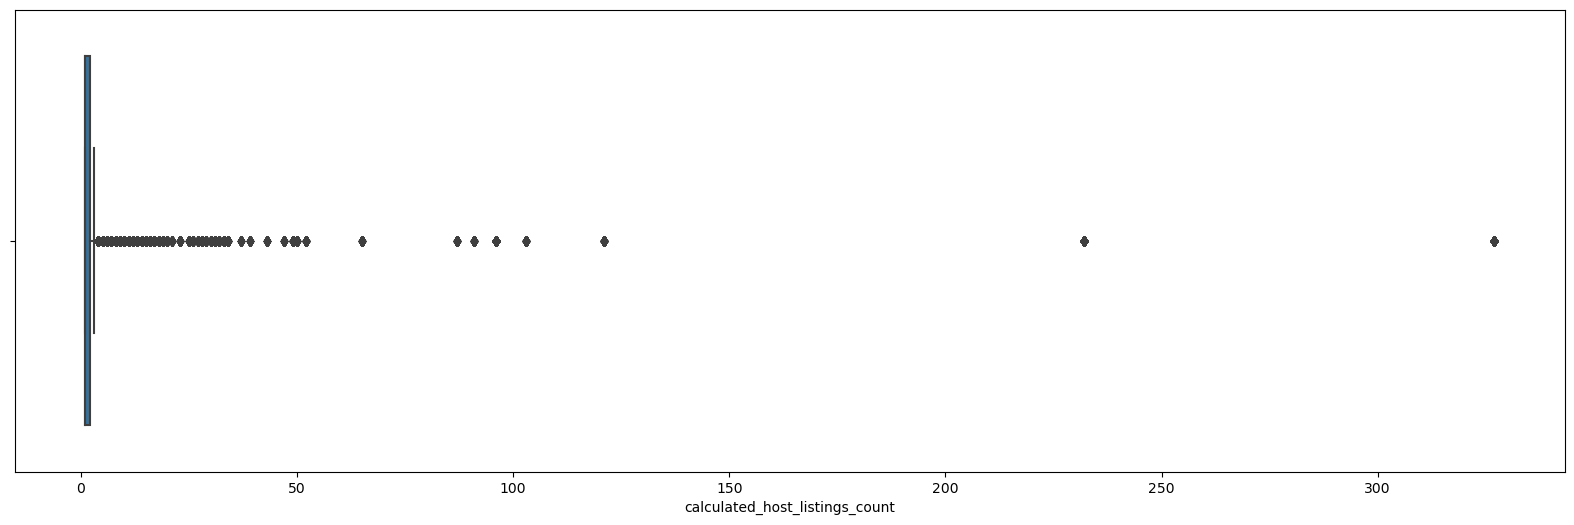

In [72]:
plt.figure(figsize = (20,6))
sns.boxplot(data = nyc , x = 'calculated_host_listings_count')
plt.show()

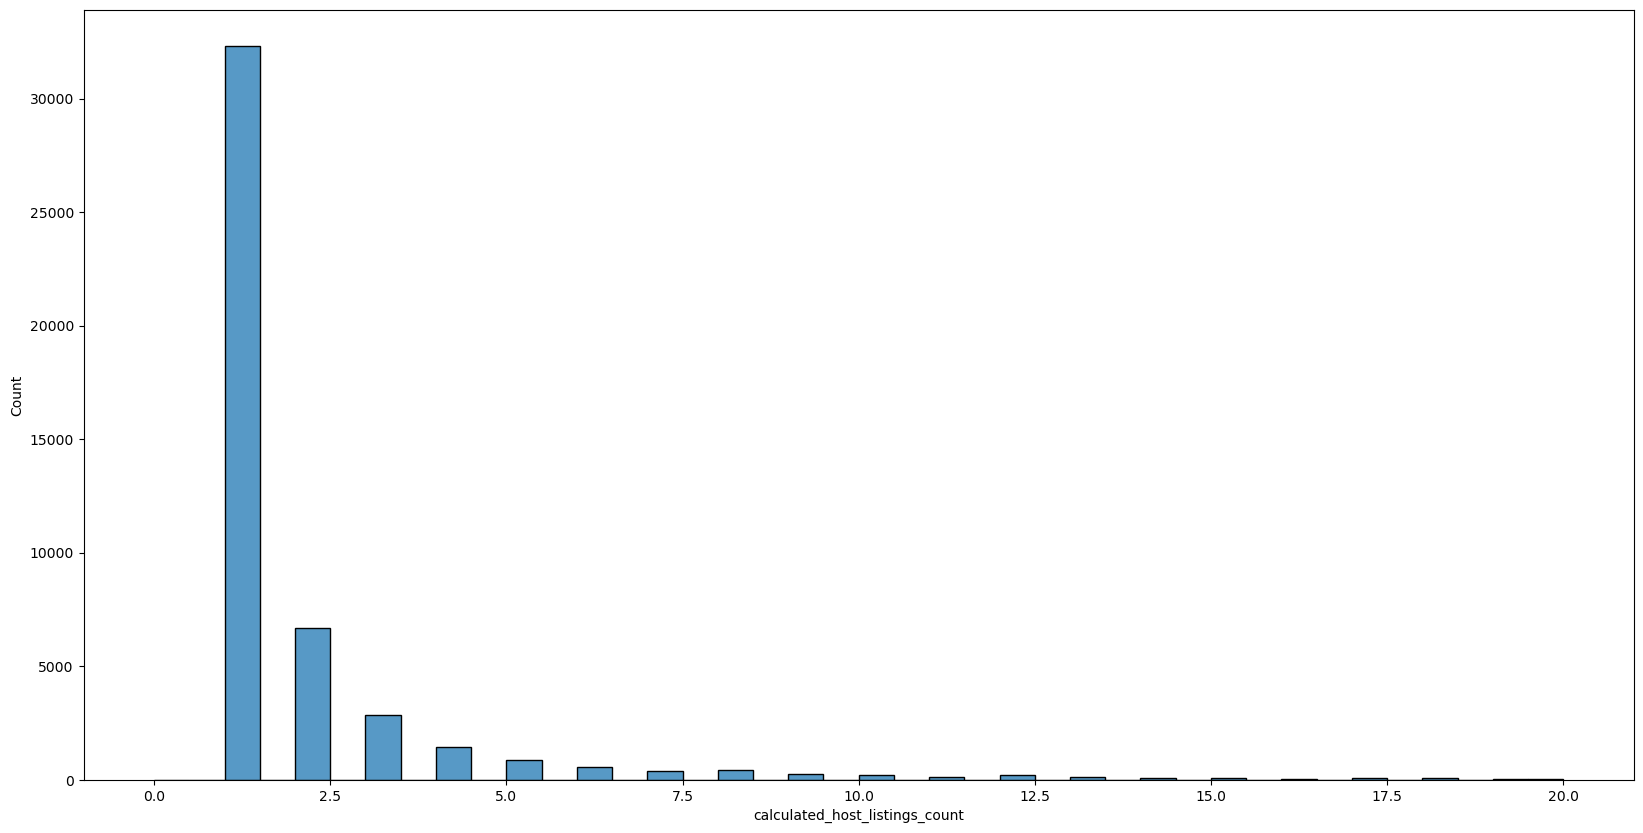

In [73]:
plt.figure(figsize = (20,10))
sns.histplot(data =nyc, x = 'calculated_host_listings_count',bins=40,binrange=(0,20))
plt.show()

### 6.12 availability_365

In [74]:
nyc.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

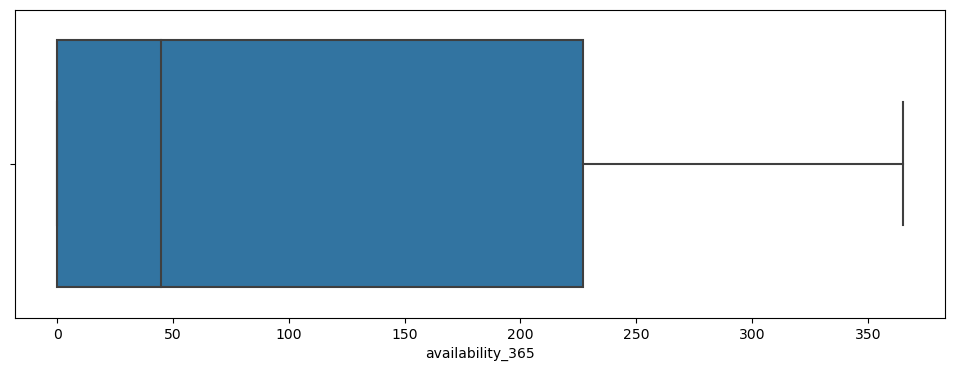

In [75]:
plt.figure(figsize = (12,4))
sns.boxplot(data = nyc, x = 'availability_365')
plt.show()

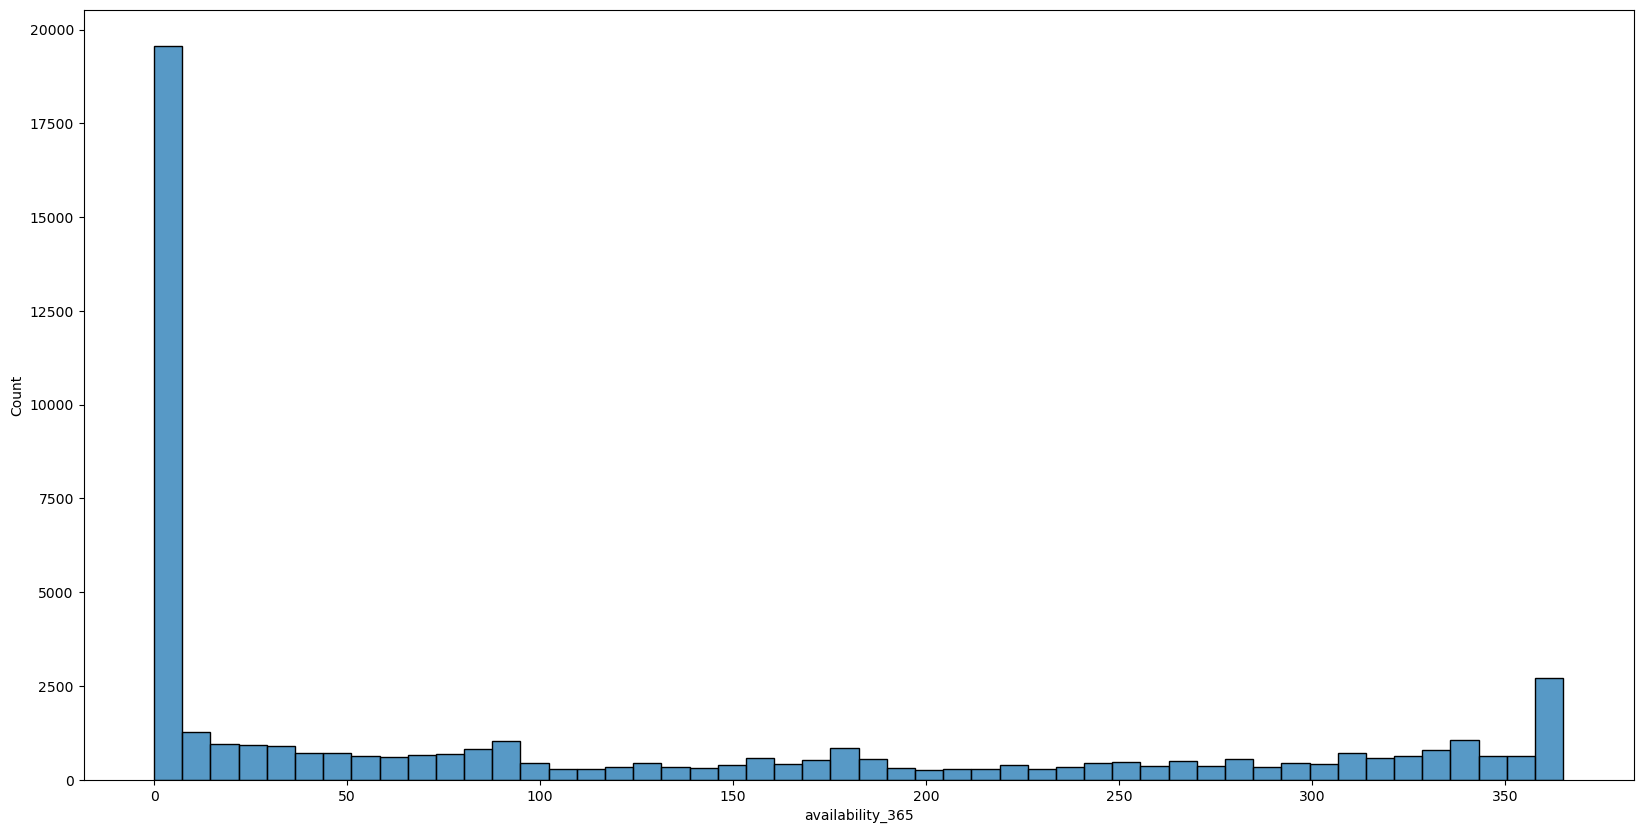

In [76]:
plt.figure(figsize = (20,10))
sns.histplot(data =nyc, x = 'availability_365',bins=50,binrange=(0,365))
plt.show()

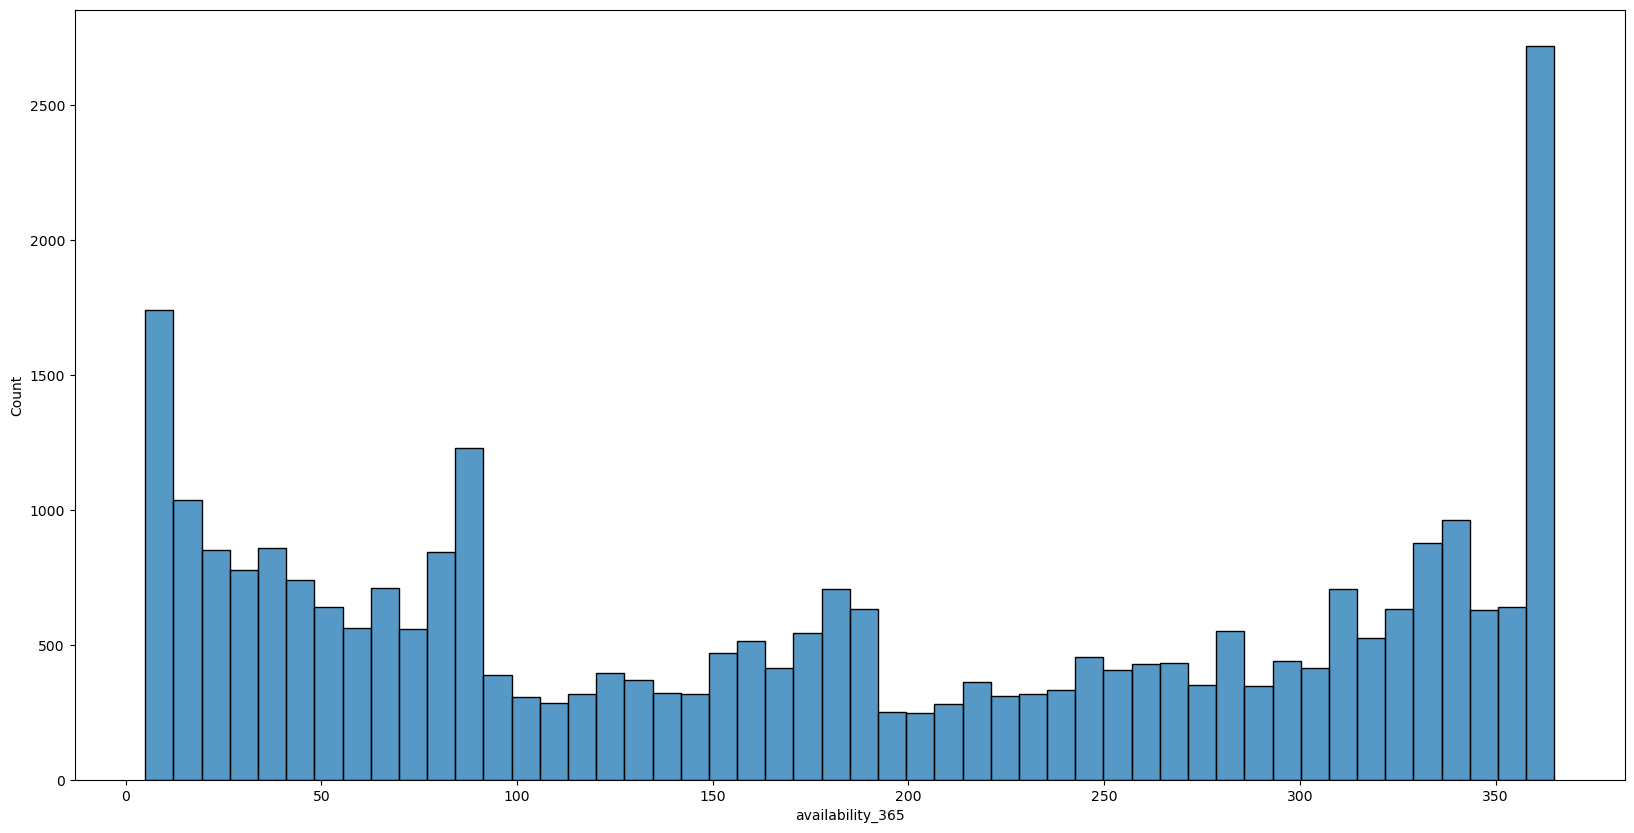

In [77]:
plt.figure(figsize = (20,10))
sns.histplot(data =nyc, x = 'availability_365',bins=50,binrange=(5,365))
plt.show()

### 6.13 minimum_night_categories

In [78]:
nyc.minimum_night_categories.value_counts(normalize= True)*100

Low          40.280192
very Low     26.014930
very High    14.997444
Medium       12.960425
High          5.747009
Name: minimum_night_categories, dtype: float64

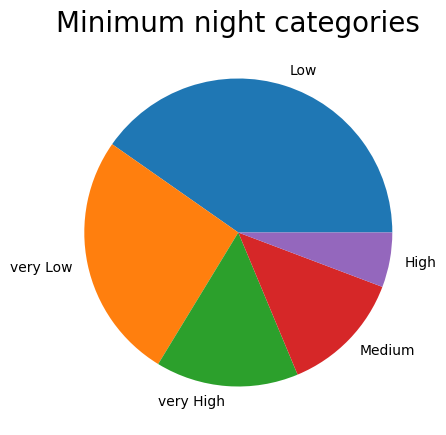

In [79]:
plt.figure(figsize=(7,5))
plt.title('Minimum night categories', fontdict={'fontsize': 20})
plt.pie(x = nyc.minimum_night_categories.value_counts(),labels=nyc.minimum_night_categories.value_counts().index)
plt.show()

### 6.14 number_of_reviews_categories

In [80]:
nyc.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [81]:
nyc.number_of_reviews_categories.value_counts()

Low          26032
very Low     12720
High          5893
Medium        3503
very High      747
Name: number_of_reviews_categories, dtype: int64

In [82]:
nyc.number_of_reviews_categories.value_counts(normalize=True)*100

Low          53.240618
very Low     26.014930
High         12.052357
Medium        7.164332
very High     1.527764
Name: number_of_reviews_categories, dtype: float64

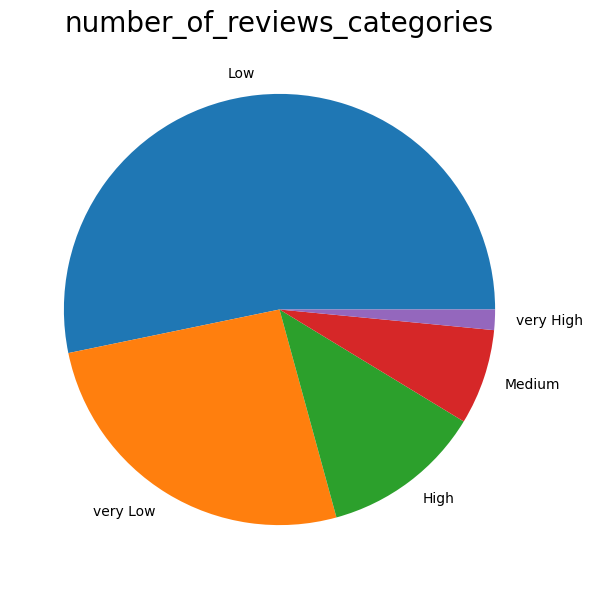

In [83]:
plt.figure(figsize=(12,7))
plt.title('number_of_reviews_categories', fontdict={'fontsize': 20})
plt.pie(x = nyc.number_of_reviews_categories.value_counts(),labels=nyc.number_of_reviews_categories.value_counts().index)
plt.show()

## 7. Bivariate and Multivariate Analysis

### 7.1 Finding the correalations

In [84]:
nyc[numerical_columns].head()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,149,1,9,0.21,6,365
1,2595,2845,225,1,45,0.38,2,355
2,3647,4632,150,3,0,NaN,1,365
3,3831,4869,89,1,270,4.64,1,194
4,5022,7192,80,10,9,0.10,1,0


In [85]:
nyc[numerical_columns].corr()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
price,0.010619,0.015309,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


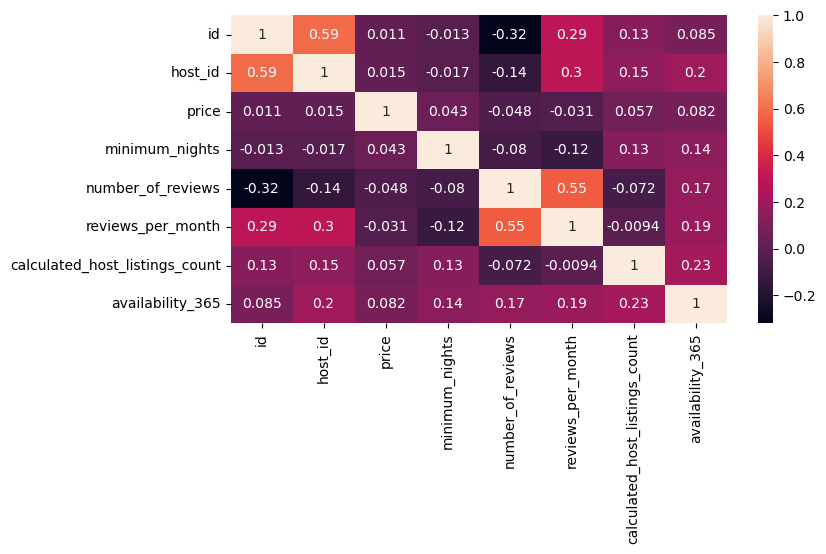

In [86]:
plt.figure(figsize=(8,4))
sns.heatmap(data = nyc[numerical_columns].corr(),annot=True)
plt.show()

### 7.2 Finding Top correlations

In [87]:
corr_matrix = nyc[numerical_columns].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [88]:
corr_matrix

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,0.010619,0.013224,0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.015309,0.017364,0.140106,0.296417,0.154950,0.203492
price,0.010619,0.015309,1.000000,0.042799,0.047954,0.030608,0.057472,0.081829
minimum_nights,0.013224,0.017364,0.042799,1.000000,0.080116,0.121702,0.127960,0.144303
number_of_reviews,0.319760,0.140106,0.047954,0.080116,1.000000,0.549868,0.072376,0.172028
reviews_per_month,0.291828,0.296417,0.030608,0.121702,0.549868,1.000000,0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.057472,0.127960,0.072376,0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [89]:
# Top meaningful correlations
sol[1:8]

number_of_reviews               reviews_per_month    0.549868
id                              number_of_reviews    0.319760
host_id                         reviews_per_month    0.296417
id                              reviews_per_month    0.291828
calculated_host_listings_count  availability_365     0.225701
host_id                         availability_365     0.203492
reviews_per_month               availability_365     0.185791
dtype: float64

### 7.3 number_of_reviews_categories and prices

In [90]:
# prices for each of reviews_categories
x1 = nyc.groupby('number_of_reviews_categories').price.sum().sort_values(ascending = False)
x1

number_of_reviews_categories
Low          4002323
very Low     1806531
High          971346
Medium        508647
very High     178431
Name: price, dtype: int64

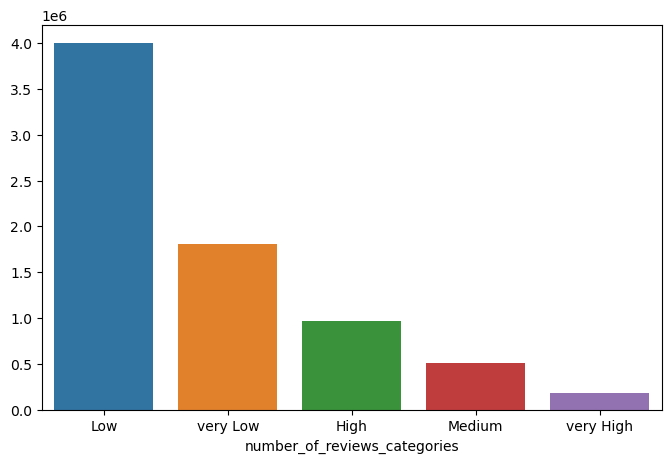

In [91]:
plt.figure(figsize=(8,5))
sns.barplot(x = x1.index,y = x1.values)
plt.show()

<Axes: xlabel='number_of_reviews_categories', ylabel='price'>

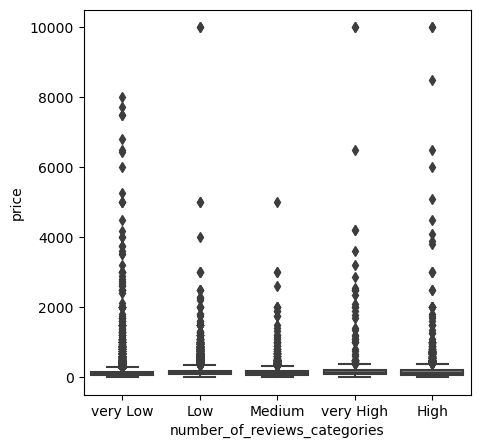

In [92]:
plt.figure(figsize=(5,5))
sns.boxplot(x = nyc.number_of_reviews_categories , y = nyc.price)

In [93]:
nyc.groupby('number_of_reviews_categories').price.mean().sort_values()

number_of_reviews_categories
very Low     142.022877
Medium       145.203254
Low          153.746274
High         164.830477
very High    238.863454
Name: price, dtype: float64

In [94]:
nyc.groupby('number_of_reviews_categories').price.median().sort_values()

number_of_reviews_categories
very Low      90.0
Medium       105.0
High         120.0
Low          120.0
very High    120.0
Name: price, dtype: float64

In [95]:
x2 = pd.DataFrame(x1)
x2 = x2.reset_index()
x2

,number_of_reviews_categories,price
0,Low,4002323
1,very Low,1806531
2,High,971346
3,Medium,508647
4,very High,178431


In [96]:
((x2.groupby('number_of_reviews_categories').price.sum()/x2.price.sum())*100).sort_values(ascending = True)

number_of_reviews_categories
very High     2.389505
Medium        6.811679
High         13.008033
very Low     24.192631
Low          53.598152
Name: price, dtype: float64

#### What is the pricing ranges preferred by customers?
#### The total price for  'Low' or 'very Low' number_of_reviews_categories are high.

### 7.4 ('room_type' and  'number_of_reviews_categories') 

In [97]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium


In [98]:
nyc.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [99]:
pd.crosstab(nyc['room_type'],nyc['number_of_reviews_categories'])

number_of_reviews_categories,High,Low,Medium,very High,very Low
room_type,,,,,
Entire home/apt,3809,14909,1960,504,4227
Private room,1950,10769,1494,226,7887
Shared room,134,354,49,17,606


In [100]:
nyc.groupby('room_type').number_of_reviews.sum() 

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [101]:
nyc.groupby('room_type').number_of_reviews.sum()/nyc.room_type.value_counts()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
dtype: float64

#### Entire home/apt properties receive significantly more reviews compared to shared rooms, indicating higher customer engagement.
##### Shared rooms account for only 16% of total reviews, showing that guests in shared spaces are less likely to leave feedback.
##### This suggests that customer preference leans towards entire home/apt listings, which are perceived as more desirable and receive more reviews.



### 7.5'room_type' and 'reviews_per_month'

In [102]:
nyc.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [103]:
nyc.groupby('room_type').reviews_per_month.mean()

room_type
Entire home/apt    1.306578
Private room       1.445209
Shared room        1.471726
Name: reviews_per_month, dtype: float64

In [104]:
nyc.groupby('room_type').reviews_per_month.median()

room_type
Entire home/apt    0.66
Private room       0.77
Shared room        0.98
Name: reviews_per_month, dtype: float64

In [105]:
nyc.groupby('room_type').reviews_per_month.sum()

room_type
Entire home/apt    26565.34
Private room       25529.62
Shared room         1245.08
Name: reviews_per_month, dtype: float64

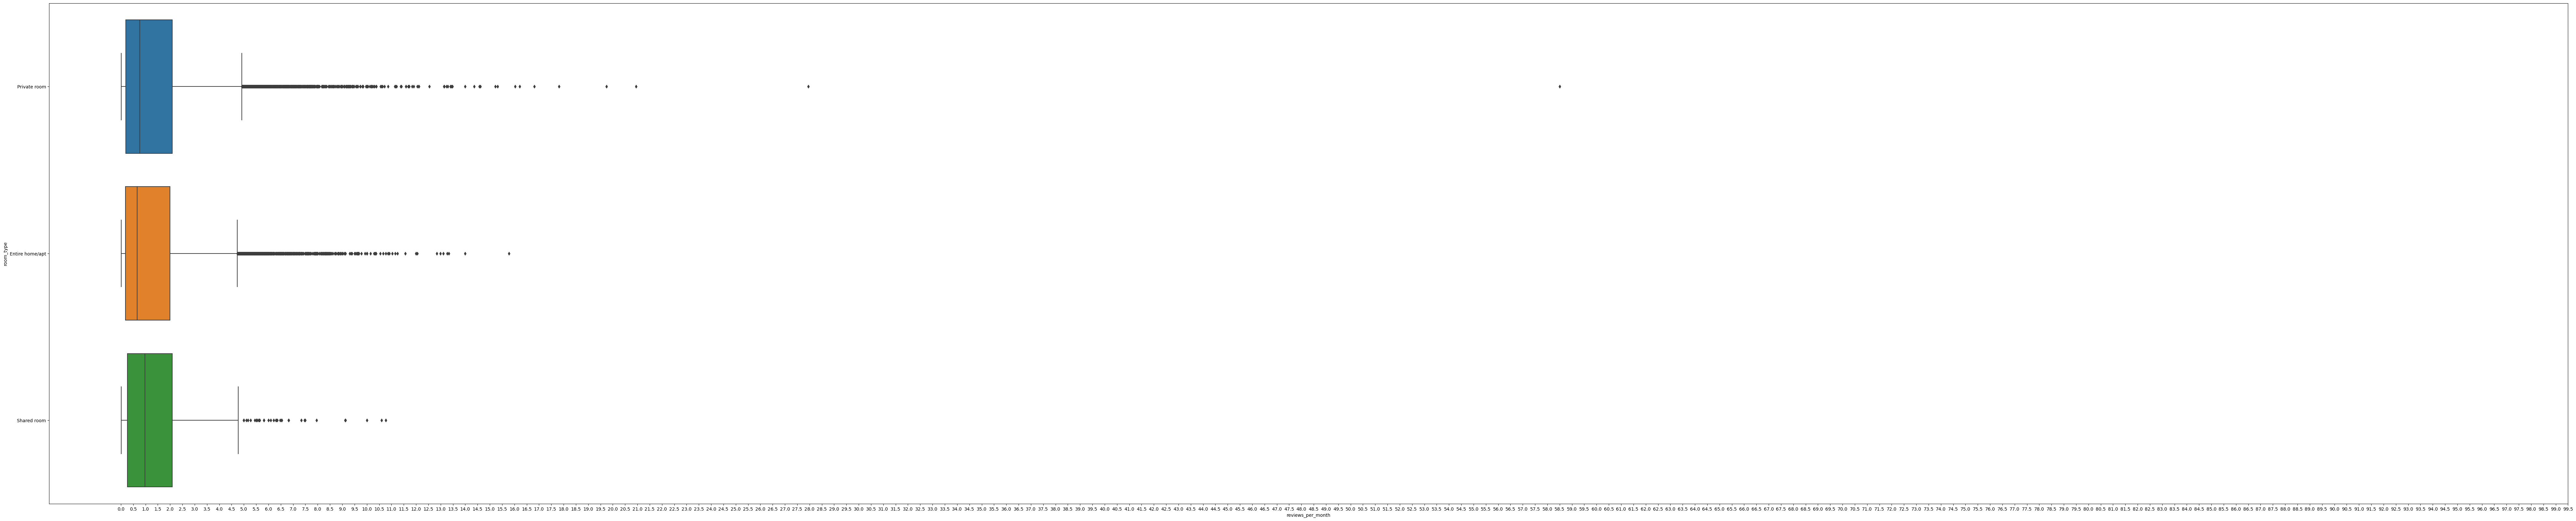

In [106]:
plt.figure(figsize=(100,20))
sns.boxplot(data = nyc, y = 'room_type' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

#### For each 'room_type' there are ~1.4 reviews per month on average.

### 7.6 minimum_night_categories and reviews_per_month

In [107]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium


In [108]:
nyc.groupby('minimum_night_categories').reviews_per_month.sum().sort_values()

minimum_night_categories
High          1227.57
very High     2235.19
Medium        4689.73
very Low     20395.49
Low          24792.06
Name: reviews_per_month, dtype: float64

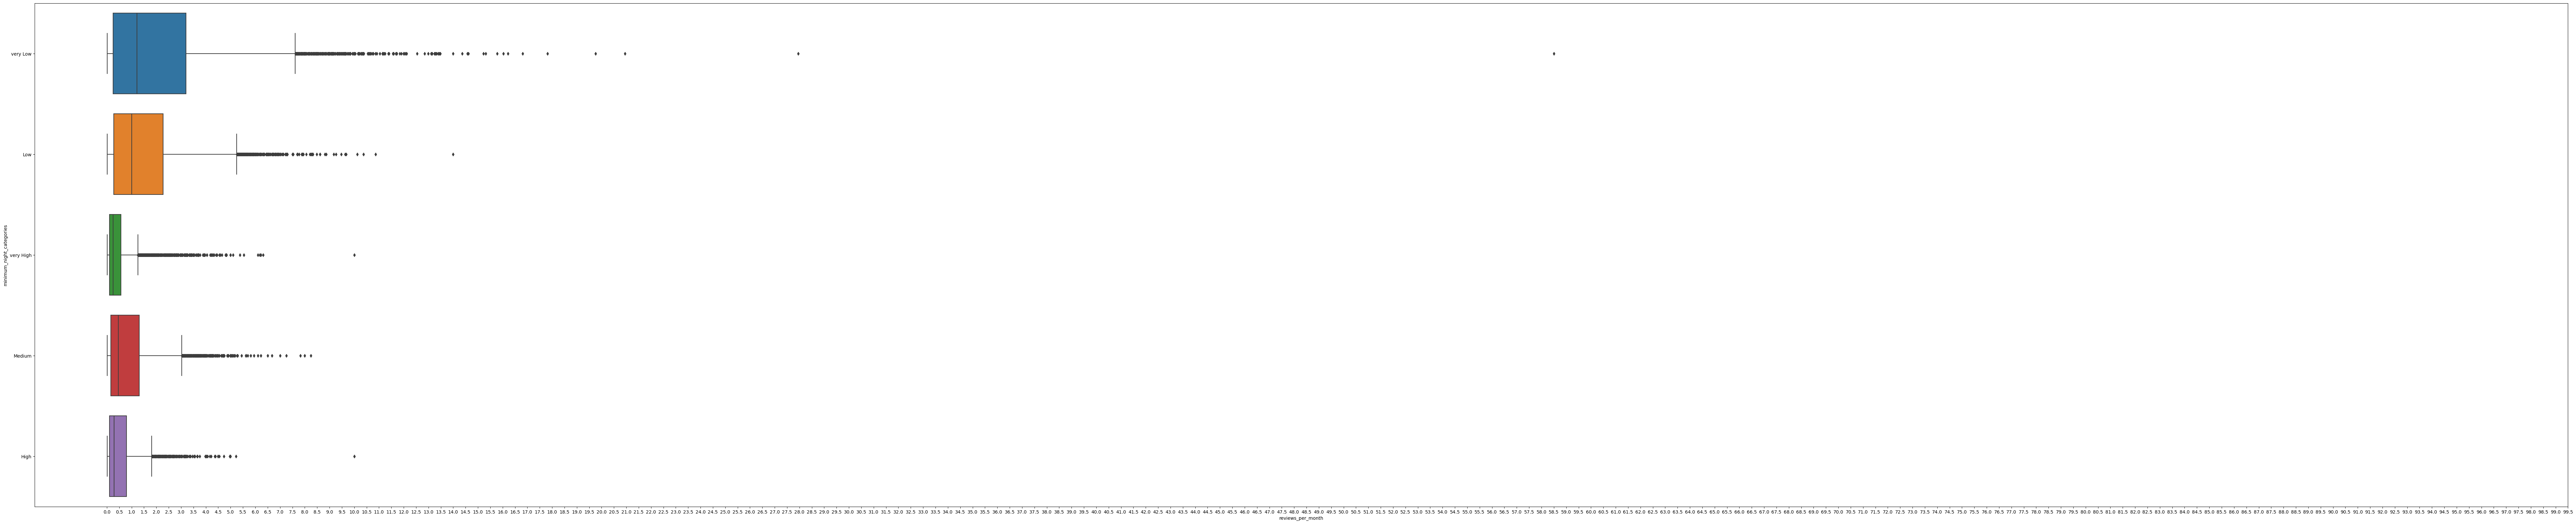

In [109]:
plt.figure(figsize=(100,20))
sns.boxplot(data = nyc, y = 'minimum_night_categories' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

#### Customer's are more likely to leave reviews for low number of minimum nights

#### Adjustments in the existing properties to make it more customer-oriented. ?
minimum_nights should be on the lower side to make properties more customer-oriented


### 7.8 'availability_365_categories', 'price_categories' and 'reviews_per_month'

In [110]:
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium


In [111]:
nyc.availability_365_categories.value_counts()

very Low     17941
Low          11829
very High     8108
Medium        5792
High          5225
Name: availability_365_categories, dtype: int64

#### If the combination of availability and price is very high, reviews_per_month will be low on average.
#### Very high availability and very low price are likely to get more reviews.

Text(0.5, 1.0, 'Location Co-ordinates')

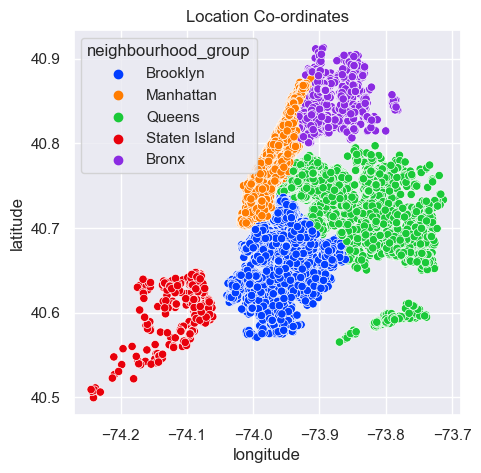

In [118]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (5,5)})
ax= sns.scatterplot(data=nyc, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')


Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

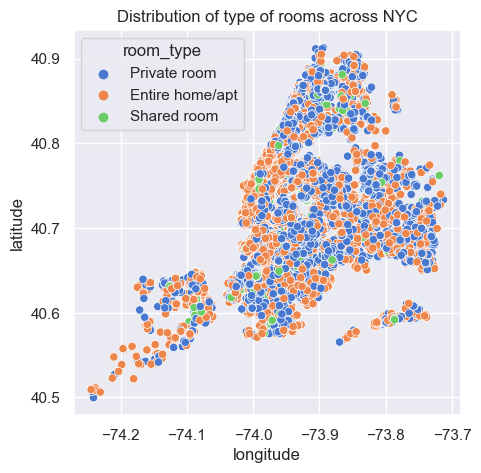

In [119]:
#Room Types distribution geographically
sns.set(rc={"figure.figsize": (5, 5)})
ax= sns.scatterplot(x=nyc.longitude, y=nyc.latitude,hue=nyc.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')

By the two scatterplots of latitude vs longitude we can infer there's is very less shared room throughout NYC as compared to private and Entire home/apt.

95% of the listings on Airbnb are either Private room or Entire/home apt. Very few guests had opted for shared rooms on Airbnb.

Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

We can infer that there are high range of prices across Manhattan being the most costliest place to stay in NYC

In [120]:
nyc.to_csv('AB_NYC_2019_processed.csv')